In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score, adjusted_rand_score



In [9]:
data=load_breast_cancer()
X=data.data
y=data.target
feature_names=data.feature_names
df=pd.DataFrame(X,columns=feature_names)
df['target']=y
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
kmeans=KMeans(n_clusters=2,random_state=42,n_init=10)
y_pred=kmeans.fit_predict(X_scaled)

In [4]:
df['cluster']=y_pred

In [5]:
ari_score=adjusted_rand_score(y,y_pred)
silhouette_avg=silhouette_score(X_scaled,y_pred)
print(f"adjusted rand index:{ari_score:3f}")
print(f"silhouette score:{silhouette_avg:3f}")


adjusted rand index:0.670721
silhouette score:0.344974


In [6]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

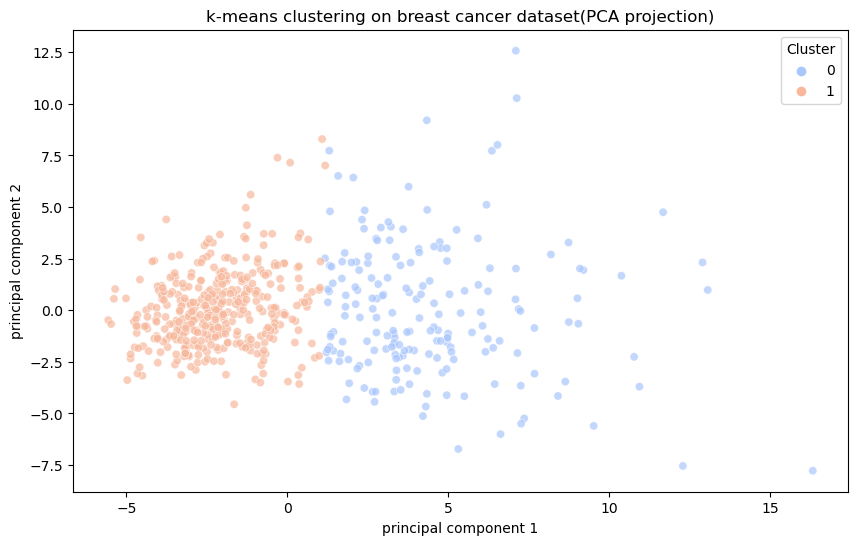

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_pred,palette='coolwarm',alpha=0.7)
plt.title("k-means clustering on breast cancer dataset(PCA projection)")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.legend(title="Cluster")
plt.show()